In [1]:
import cv2 
from PIL import Image, ImageEnhance
import imageio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def dodgeV2(x, y):
    return cv2.divide(x, 255 - y, scale=256)

In [3]:
def CreateSktetch(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_invert = cv2.bitwise_not(img_gray)
    img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
    final_img = dodgeV2(img_gray, img_smoothing)
    
    im = Image.fromarray(np.uint8(final_img))
    
    enhancer = ImageEnhance.Contrast(im)
    factor = 5
    im_output = enhancer.enhance(factor)
    return im_output
    


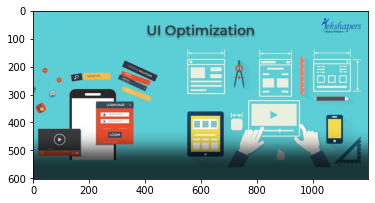

In [4]:
imageName ='ui_image'
img = imageio.imread(imageName+'.jpg')
plt.imshow(img)

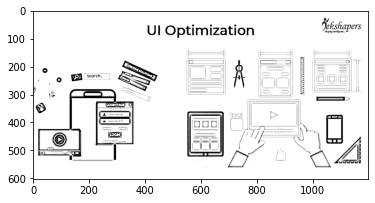

In [5]:
img = CreateSktetch(img)
plt.imshow(img, cmap='gray')
